In [1]:
from utils import * 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

### Optimization results

In [2]:
df_ASAP =   pd.read_csv('./../ExpLogs/summ_c_ASAP.csv')
df_NoV2G =  pd.read_csv('./../ExpLogs/summ_c_NoV2G.csv')
df_Optim =  pd.read_csv('./../ExpLogs/summ_c_Optim.csv')
df_Optim1 = pd.read_csv('./../ExpLogs/summ_c2_Optim.csv')

df_res = pd.concat([df_ASAP, df_NoV2G, df_Optim, df_Optim1], axis=0).reset_index(drop=True)
df_res

,name,transf,client,payoff,total
0,c_ASAP,14937.478645,18301.238246,0.000000,3363.759602
1,c_NoV2G,7522.477944,18301.238246,0.000000,10778.760303
2,c_Optim,6181.244077,18301.238246,1535.183674,10584.810496
3,c2_Optim,4356.432017,18301.238246,1253.999285,12690.806944


In [59]:
df_jan_ASAP = pd.read_csv('./../ExpLogs/jan_ASAP.csv')
df_jan_NoV2G = pd.read_csv('./../ExpLogs/jan_NoV2G.csv')
df_jan_Optim = pd.read_csv('./../ExpLogs/jan_Optim.csv')
df_feb_ASAP = pd.read_csv('./../ExpLogs/feb_ASAP.csv')
df_feb_NoV2G = pd.read_csv('./../ExpLogs/feb_NoV2G.csv')
df_feb_Optim = pd.read_csv('./../ExpLogs/feb_Optim.csv')
df_mar_ASAP = pd.read_csv('./../ExpLogs/mar_ASAP.csv')
df_mar_NoV2G = pd.read_csv('./../ExpLogs/mar_NoV2G.csv')
df_mar_Optim = pd.read_csv('./../ExpLogs/mar_Optim.csv')

In [3]:

df_ASAP =   pd.read_csv('./../ExpLogs/summ_nc_ASAP.csv')
df_NoV2G =  pd.read_csv('./../ExpLogs/summ_nc_NoV2G.csv')
df_Optim =  pd.read_csv('./../ExpLogs/summ_nc_Optim.csv')
df_Optim1 = pd.read_csv('./../ExpLogs/summ_nc2_Optim.csv')

df_res = pd.concat([df_ASAP, df_NoV2G, df_Optim, df_Optim1], axis=0).reset_index(drop=True)
df_res

,name,transf,client,payoff,total
0,nc_ASAP,14937.478645,18301.238246,0.000000,3363.759602
1,nc_NoV2G,7522.477944,18301.238246,0.000000,10778.760303
2,nc_Optim,3595.171122,18301.238246,1733.129025,12972.938099
3,nc2_Optim,3595.171122,18301.238246,1733.129025,12972.938099


In [4]:
# Normalization dicts
optim_train = pd.read_csv("./../ExpLogs/train_Optim.csv")
optim_val = pd.read_csv("./../ExpLogs/val_Optim.csv")
optim_test = pd.read_csv("./../ExpLogs/test_Optim.csv")

nov2g_train = pd.read_csv("./../ExpLogs/train_NoV2G.csv")
nov2g_val =     pd.read_csv("./../ExpLogs/val_NoV2G.csv")
nov2g_test =   pd.read_csv("./../ExpLogs/test_NoV2G.csv")

asap_train = pd.read_csv("./../ExpLogs/train_ASAP.csv")
asap_val =     pd.read_csv("./../ExpLogs/val_ASAP.csv")
asap_test =   pd.read_csv("./../ExpLogs/test_ASAP.csv")


In [5]:
optim_test2 = pd.read_csv("./../ExpLogs/c2_Optim.csv")
optim_test2["imbalance_bill"].sum()

61681.70946062972

In [49]:
optim_test2.head()

,ts,arr_e_req,client_bill,assigned_type,realized_type,fail_time,fail_energy1,fail_energy2,fail_energy_both,fail_IR,chg_e_req,imbalance_bill,n_cars,avg_lax,payoff
0,166559.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.0,0.000000,NaN
1,166560.0,10.78,0.68992,[[0. 0. 1.]\n [0. 0. 0.]\n [0. 0. 0.]],[[0. 0. 1.]\n [0. 0. 0.]\n [0. 0. 0.]],0.0,0.0,0.0,0.0,0.0,-4.968767e-15,-2.305905e-13,1.0,0.240000,0.0
2,166561.0,0.00,0.00000,[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]],[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]],0.0,0.0,0.0,0.0,0.0,1.100748e-14,3.773365e-13,1.0,0.200000,0.0
3,166562.0,0.00,0.00000,[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]],[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]],0.0,0.0,0.0,0.0,0.0,-5.776229e-02,-2.708358e+00,1.0,0.142504,0.0
4,166563.0,0.00,0.00000,[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]],[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]],0.0,0.0,0.0,0.0,0.0,7.747880e-11,2.684486e-09,1.0,0.102504,0.0


In [6]:
optim_test["imbalance_bill"].sum()

3595.171122161083

### RL Results

In [129]:
def load_rl_gen(name, num, dir = "", month = False, norm_dict = None):
    train_str = [f"./../ExpLogs/{dir}summ_train_{name}_{i}.csv" for i in range(num)]
    val_str   = [f"./../ExpLogs/{dir}summ_val_{name}_{i}.csv" for i in range(num)]
    test_str  = [f"./../ExpLogs/{dir}summ_test_{name}_{i}.csv" for i in range(num)]

    df_train = pd.concat([pd.read_csv(i) for i in train_str], axis=0).reset_index(drop=True)
    df_val = pd.concat([pd.read_csv(i) for i in val_str], axis=0).reset_index(drop=True)
    df_test = pd.concat([pd.read_csv(i) for i in test_str], axis=0).reset_index(drop=True)

    if norm_dict is not None:
        df_train["transf"] /= norm_dict["train"]
        df_val["transf"] /= norm_dict["val"]
        df_test["transf"] /= norm_dict["test"]

    return df_train, df_val, df_test

def load_rl(name, num, dir = ""):
    load_str = [f"./../ExpLogs/{dir}summ_{name}_{i}.csv" for i in range(num)]
    df_res = pd.concat([pd.read_csv(i) for i in load_str], axis=0).reset_index(drop=True)
    return df_res

def draw_hlines(ax, asap, nov2g, optim, x_max = 100):
    fontsize = 15
    ax.hlines(asap.sum(),  0, x_max, color='k', ls=':')
    ax.text(5, asap.sum(), "ASAP", fontsize = fontsize-4)
    ax.hlines(nov2g.sum(),  0, x_max, color='k', ls=':')
    ax.text(5, nov2g.sum(), "NoV2G", fontsize = fontsize-4)
    ax.hlines(optim.sum(), 0, x_max, color='k', ls=':')
    ax.text(5, optim.sum(), "Optim", fontsize = fontsize-4)

    #ax.set_ylim(0, 1.1*asap.sum())
    ax.set_xlabel("Episode")

    return ax

In [130]:
norm_dict = {"train": optim_train["imbalance_bill"].sum(), "val": optim_val["imbalance_bill"].sum(), "test": optim_test["imbalance_bill"].sum()}
month_norm_dict = {"train": optim_train["imbalance_bill"][:768].sum(), "val": optim_val["imbalance_bill"][:768].sum(), "test": optim_test["imbalance_bill"][:768].sum()}
##df_train, df_val, df_test = load_rl_gen("sac_gen_a", 34, norm_dict = norm_dict)
#df_m_train, df_m_val, df_m_test = load_rl_gen("month_sac_c", 697)

# Baseline
#df_res = load_rl("month_sac_c", 50) 
df_res = load_rl("month_sac_IX_j", 200) 

Text(0, 0.5, 'Imbalance Bill')

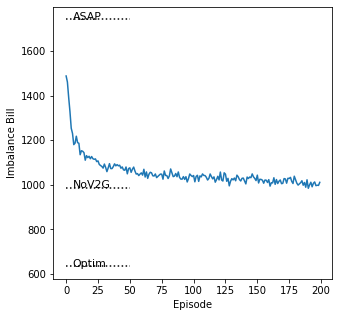

In [131]:
fig1, (ax1) = plt.subplots(1,1, figsize=(5,5))

ax1 = draw_hlines(ax1, asap_test["imbalance_bill"][:768].sum(), nov2g_test["imbalance_bill"][:768].sum(), optim_test["imbalance_bill"][:768].sum(), x_max = 50)
ax1.plot(df_res["transf"])
ax1.set_ylabel("Imbalance Bill")

Text(0.5, 0.98, 'Month SAC')

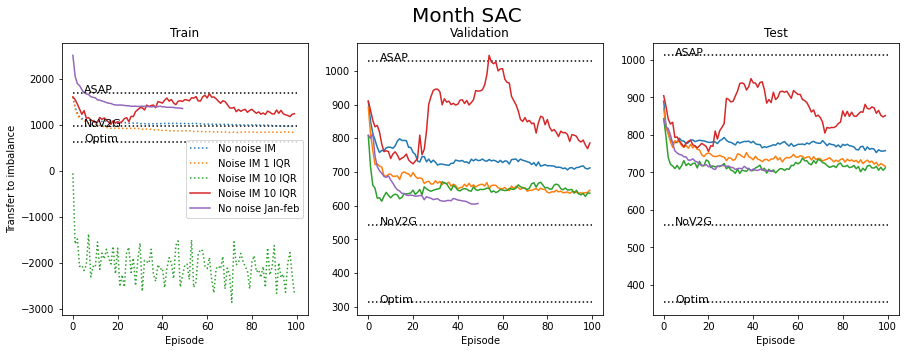

In [159]:
# Month

df_m_train, df_m_val, df_m_test = load_rl_gen("month_sac_gen_a", 100)
df_m2_train, df_m2_val, df_m2_test = load_rl_gen("month_sac_gen_b", 100) # Questionable procedure for noise
df_m3_train, df_m3_val, df_m3_test = load_rl_gen("month_sac_gen_c", 100) # Noise 10 IQR, good proc for noise?
df_m4_train, df_m4_val, df_m4_test = load_rl_gen("month_sac_gen_d", 100) # Noise 1 IQR, good proc for noise
df_m5_train, df_m5_val, df_m5_test = load_rl_gen("month_sac_gen_e", 50) # Noise 1 IQR, good proc for noise

fig1, (ax1, ax2, ax3) =  plt.subplots(1,3, figsize=(15,5)) #, sharey = True)


ax1 = draw_hlines(ax1, df_jan_ASAP["imbalance_bill"].sum(), df_jan_NoV2G["imbalance_bill"].sum(), df_jan_Optim["imbalance_bill"].sum(), x_max = 100)
ax2 = draw_hlines(ax2, df_feb_ASAP["imbalance_bill"].sum(), df_feb_NoV2G["imbalance_bill"].sum(), df_feb_Optim["imbalance_bill"].sum(), x_max = 100)
ax3 = draw_hlines(ax3, df_mar_ASAP["imbalance_bill"].sum(), df_mar_NoV2G["imbalance_bill"].sum(), df_mar_Optim["imbalance_bill"].sum(), x_max = 100)

ax1.plot(df_m_train["transf"], label = "No noise IM", ls=":")
ax2.plot(  df_m_val["transf"])
ax3.plot( df_m_test["transf"])

ax1.plot(df_m2_train["transf"], label = "Noise IM 1 IQR", ls=":")
ax2.plot(  df_m2_val["transf"])
ax3.plot( df_m2_test["transf"])

ax1.plot(df_m3_train["transf"], label = "Noise IM 10 IQR", ls=":")
ax2.plot(  df_m3_val["transf"])
ax3.plot( df_m3_test["transf"])

ax1.plot(df_m4_train["transf"], label = "Noise IM 10 IQR")
ax2.plot(  df_m4_val["transf"])
ax3.plot( df_m4_test["transf"])

ax1.plot(df_m5_train["transf"], label = "No noise Jan-feb")
ax2.plot(  df_m5_val["transf"])
ax3.plot( df_m5_test["transf"])

ax1.set_title("Train")
ax2.set_title("Validation")
ax3.set_title("Test")

ax1.set_ylabel("Transfer to imbalance")
ax1.legend()
fig1.suptitle("Month SAC", fontsize = 20)

Text(0.5, 0.98, 'SAC')

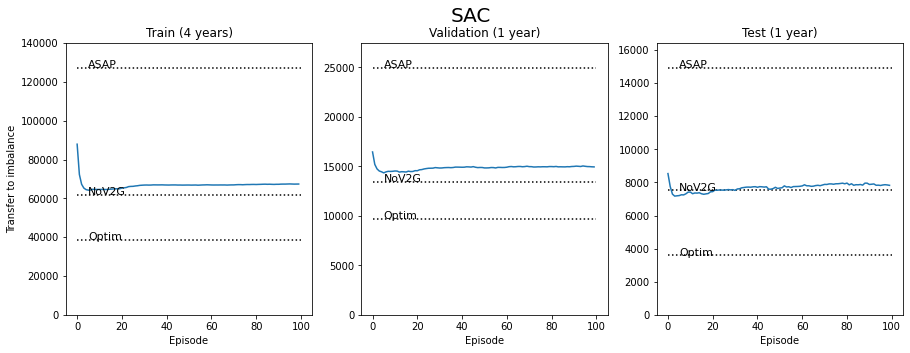

In [133]:
# Year
df_train, df_val, df_test = load_rl_gen("sac_c", 100)
#df_train, df_val, df_test = load_rl_gen("sac_d_c", 6)

fig1, (ax1, ax2, ax3) =  plt.subplots(1,3, figsize=(15,5)) #, sharey = True)

ax1 = draw_hlines(ax1, asap_train["imbalance_bill"].sum(), nov2g_train["imbalance_bill"].sum(), optim_train["imbalance_bill"].sum())
ax2 = draw_hlines(ax2, asap_val["imbalance_bill"].sum(), nov2g_val["imbalance_bill"].sum(), optim_val["imbalance_bill"].sum())
ax3 = draw_hlines(ax3, asap_test["imbalance_bill"].sum(), nov2g_test["imbalance_bill"].sum(), optim_test["imbalance_bill"].sum())

ax1.plot(df_train["transf"])
ax2.plot(  df_val["transf"])
ax3.plot( df_test["transf"])

ax1.set_title("Train (4 years)")
ax2.set_title("Validation (1 year)")
ax3.set_title("Test (1 year)")

ax1.set_ylabel("Transfer to imbalance")

fig1.suptitle("SAC", fontsize = 20)

## Buffer size

Text(0.5, 1.0, 'Month SAC Buffersize')

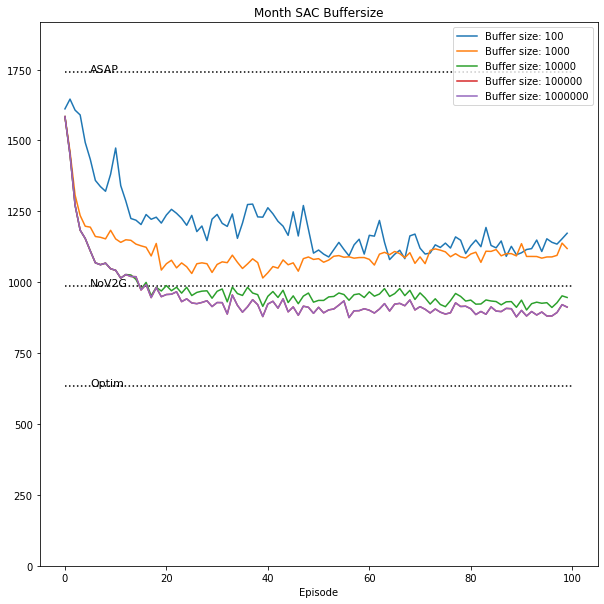

In [103]:
month_a_str = ["./../ExpLogs/summ_month_sac_IX_a_{}.csv".format(i) for i in range(100)]   
month_b_str = ["./../ExpLogs/summ_month_sac_IX_b_{}.csv".format(i) for i in range(100)]   
month_c_str = ["./../ExpLogs/summ_month_sac_IX_c_{}.csv".format(i) for i in range(100)]   
month_d_str = ["./../ExpLogs/summ_month_sac_IX_d_{}.csv".format(i) for i in range(100)]   
month_e_str = ["./../ExpLogs/summ_month_sac_IX_e_{}.csv".format(i) for i in range(100)]   

df_month_a = pd.concat([pd.read_csv(i) for i in month_a_str], axis=0).reset_index(drop=True)
df_month_b = pd.concat([pd.read_csv(i) for i in month_b_str], axis=0).reset_index(drop=True)
df_month_c = pd.concat([pd.read_csv(i) for i in month_c_str], axis=0).reset_index(drop=True)
df_month_d = pd.concat([pd.read_csv(i) for i in month_d_str], axis=0).reset_index(drop=True)
df_month_e = pd.concat([pd.read_csv(i) for i in month_e_str], axis=0).reset_index(drop=True)

fig1, (ax1) = plt.subplots(1,1, figsize=(10,10))

ax1 = draw_hlines(ax1, asap_test["imbalance_bill"][:768].sum(), nov2g_test["imbalance_bill"][:768].sum(), optim_test["imbalance_bill"][:768].sum())
ax1.plot(df_month_a["transf"], label = "Buffer size: 100")
ax1.plot(df_month_b["transf"], label = "Buffer size: 1000")
ax1.plot(df_month_c["transf"], label = "Buffer size: 10000")
ax1.plot(df_month_d["transf"], label = "Buffer size: 100000")
ax1.plot(df_month_e["transf"], label = "Buffer size: 1000000")

ax1.legend()

ax1.set_title("Month SAC Buffersize")

#/summ_month_sac_IX_e_94.csv

In [41]:
# Notes
df_train, df_val, df_test = load_rl_gen("month_sac_d", 3)
display(df_train.head())
display(df_val.head())
display(df_test.head())

,name,transf,client,payoff,total
0,train_month_sac_d_0,1583.547583,1469.562214,135.214407,-249.199776
1,train_month_sac_d_1,1290.695682,1469.562214,135.214407,43.652126
2,train_month_sac_d_2,1198.703552,1469.562214,135.214407,135.644256


,name,transf,client,payoff,total
0,val_month_sac_d_0,2278.333267,2277.450961,145.307986,-146.190293
1,val_month_sac_d_1,2056.834365,2277.450961,145.307986,75.308609
2,val_month_sac_d_2,2020.477284,2277.450961,145.307986,111.665690


,name,transf,client,payoff,total
0,test_month_sac_d_0,1736.844074,2289.492688,157.201251,395.447363
1,test_month_sac_d_1,1574.938689,2289.492688,157.201251,557.352748
2,test_month_sac_d_2,1488.377481,2289.492688,157.201251,643.913956


## Monthly optim

In [150]:
months = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"] 
agents = ["ASAP", "NoV2G", "Optim"]
l_summ_month = []
for i in range(12):
    # Concatate pandas dataframes
    l_summ_agents = []
    for agent in agents:
        df_month = pd.read_csv(f"./../ExpLogs/summ_{months[i]}_{agent}.csv")
        df_month = df_month[["transf", "client", "payoff", "total"]]
        df_month = df_month.rename(columns={"transf": f"transf_{agent.lower()}",
                                            "client": f"client_{agent.lower()}",
                                            "payoff": f"payoff_{agent.lower()}",
                                            "total":  f"total_{agent.lower()}",})
        l_summ_agents.append(df_month)
    df_month_agents = pd.concat(l_summ_agents, axis=1)
    df_month_agents["month"] = months[i]
    df_month_agents["idx_month"] = i
    l_summ_month.append(df_month_agents)

df_year = pd.concat(l_summ_month, axis=0).reset_index(drop=True)
df_year


,transf_asap,client_asap,payoff_asap,total_asap,transf_nov2g,client_nov2g,payoff_nov2g,total_nov2g,transf_optim,client_optim,payoff_optim,total_optim,month,idx_month
0,1689.668779,1469.562214,0,-220.106564,963.661917,1469.562214,0,505.900298,627.726666,1469.562214,138.628529,703.207020,jan,0
1,1029.567958,1349.047258,0,319.479300,542.264931,1349.047258,0,806.782327,312.847479,1349.047258,120.388091,915.811688,feb,1
2,1012.411478,1488.309120,0,475.897642,560.908452,1488.309120,0,927.400668,353.033254,1488.309120,155.962898,979.312968,mar,2
3,1302.818178,1468.334912,0,165.516734,784.815804,1468.334912,0,683.519108,397.395422,1468.334912,148.508029,922.431461,apr,3
4,1024.363474,1329.610918,0,305.247445,643.267146,1329.610918,0,686.343772,448.287693,1329.610918,129.108311,752.214915,may,4
5,1013.169713,1266.986394,0,253.816681,515.117967,1266.986394,0,751.868427,137.989874,1266.986394,144.774567,984.221952,jun,5
6,834.412482,1233.971674,0,399.559192,479.295076,1233.971674,0,754.676598,229.983578,1233.971674,130.454938,873.533158,jul,6
7,814.571575,1006.899328,0,192.327753,466.518536,1006.899328,0,540.380792,239.382334,1006.899328,88.347085,679.169908,aug,7
8,1076.944849,1488.591987,0,411.647138,419.230270,1488.591987,0,1069.361718,17.915567,1488.591987,150.614229,1320.062192,sep,8
9,1425.500113,1835.451533,0,409.951420,559.877027,1835.451533,0,1275.574506,27.691848,1835.451533,187.401715,1620.357970,oct,9


(0.0, 2135.0524983430605)

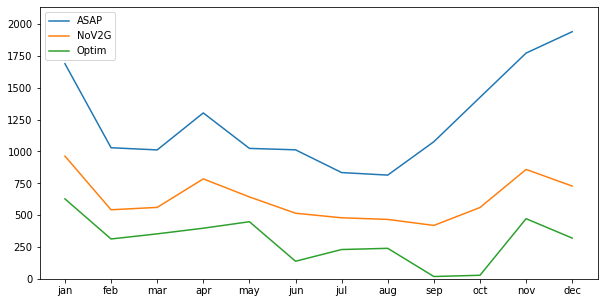

In [154]:
fig1, ax1 = plt.subplots(1,1, figsize=(10,5))

ax1.plot(df_year["transf_asap"], label = "ASAP")
ax1.plot(df_year["transf_nov2g"], label = "NoV2G")
ax1.plot(df_year["transf_optim"], label = "Optim")

ax1.legend()
ax1.set_xticks(df_year["idx_month"])
ax1.set_xticklabels(df_year["month"])
ax1.set_ylim(0, 1.1*df_year["transf_asap"].max())